## 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [4]:
Customer = pd.read_csv('Customer.csv')
Transaction = pd.read_csv('Transactions.csv')
Product_Heirarchy = pd.read_csv('prod_cat_info.csv')

In [8]:
CF_X = pd.merge(left=Customer, right=Transaction, left_on='customer_Id', right_on='cust_id', how='inner', indicator=True)
CF_X

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,both
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,both
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,both
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop,both
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both
23050,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR,both
23051,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop,both


In [10]:
Customer_Final = pd.merge(left=CF_X, right=Product_Heirarchy, left_on='prod_cat_code', right_on='prod_cat_code', how='inner')
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,1,Women


## 2. Prepare a summary report for the merged data set.
### a. Get the column names and their corresponding data types

In [12]:
Customer_Final.dtypes

customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

### b. Top/Bottom 10 observations

In [13]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,6,DIY
6,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,7,Fiction
7,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,12,Academic
8,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,11,Children


In [14]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,both,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,3,Kids


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [20]:
Customer_Final.describe()   # Q1 = 25% and Q3 = 75%

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
count,99293.000000,99257.000000,9.929300e+04,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000
mean,271030.010635,5.467221,5.007320e+10,271030.010635,6.796894,4.003243,2.438017,637.919884,248.873736,2114.616420,6.806985
std,2429.333624,2.859343,2.899361e+10,2429.333624,3.609439,1.563991,2.260726,621.576326,187.014422,2502.306768,3.615952
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,268956.000000,3.000000,2.492150e+10,268956.000000,4.000000,3.000000,1.000000,313.000000,98.280000,762.450000,4.000000
50%,270982.000000,5.000000,5.011083e+10,270982.000000,7.000000,5.000000,3.000000,713.000000,199.920000,1761.370000,7.000000
75%,273120.000000,8.000000,7.528121e+10,273120.000000,10.000000,5.000000,4.000000,1109.000000,366.975000,3585.725000,10.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000


### d. Frequency tables for all the categorical variables

In [21]:
Customer_Final.loc[:,Customer_Final.dtypes=='object'].describe()

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
count,99293,99253,99293,99293,99293,99293
unique,3987,2,1129,4,6,18
top,27-12-1988,M,25-08-2012,e-Shop,Books,Mens
freq,156,51051,153,40185,36414,7957


## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

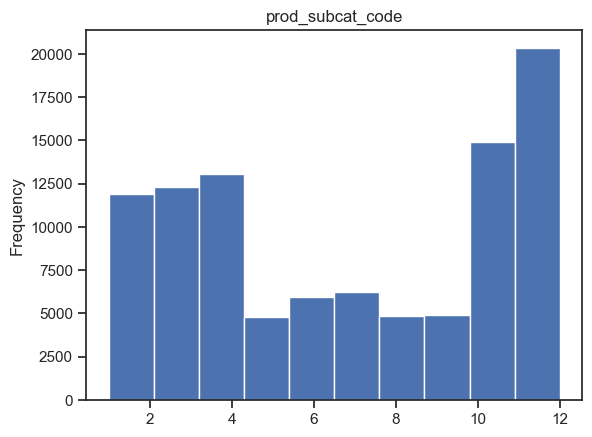

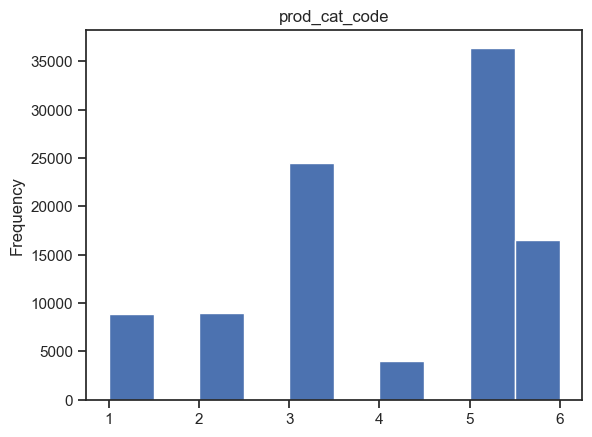

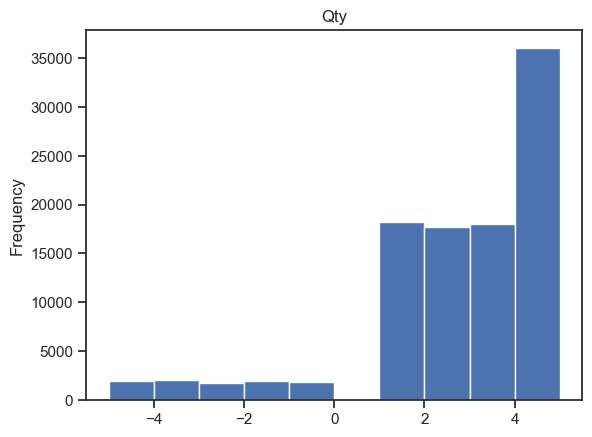

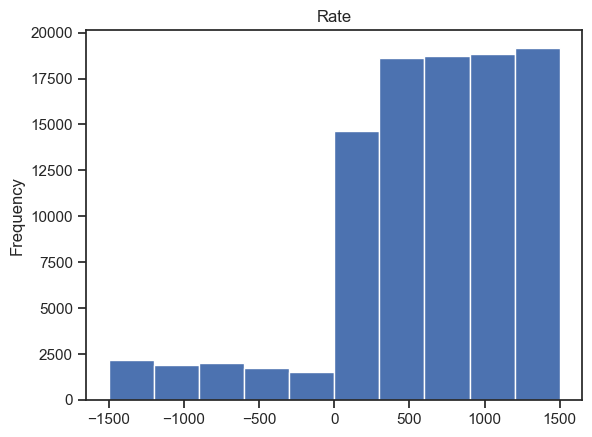

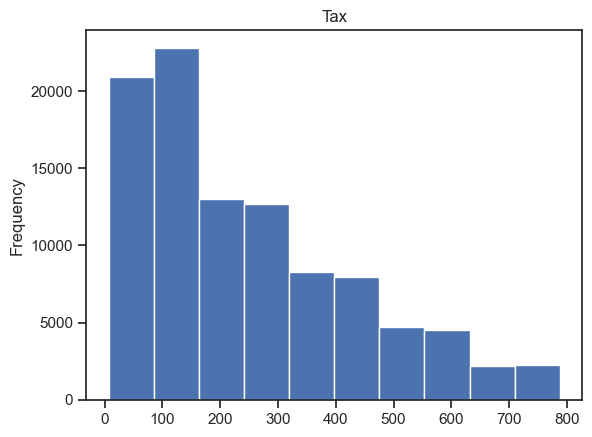

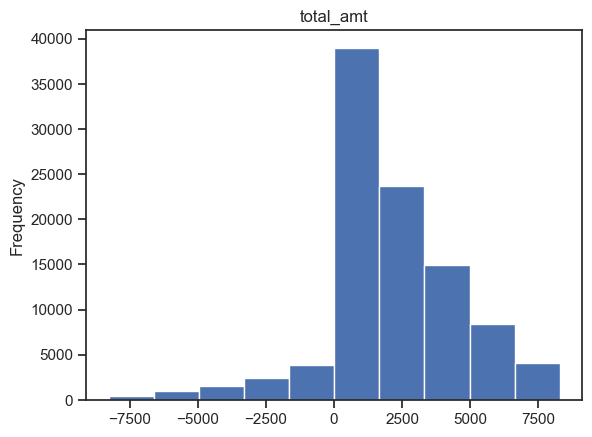

In [27]:
continuous = Customer_Final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]
for var in continuous:
    continuous[var].plot(kind='hist')
    plt.title(var)
    plt.show()

In [69]:
category_customer = Customer_Final.loc[:,Customer_Final.dtypes=='object']
category_customer.head()

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
0,02-01-1970,M,13-01-2014,TeleShop,Books,Fiction
1,02-01-1970,M,13-01-2014,TeleShop,Books,Academic
2,02-01-1970,M,13-01-2014,TeleShop,Books,Non-Fiction
3,02-01-1970,M,13-01-2014,TeleShop,Books,Children
4,02-01-1970,M,13-01-2014,TeleShop,Books,Comics


<Axes: >

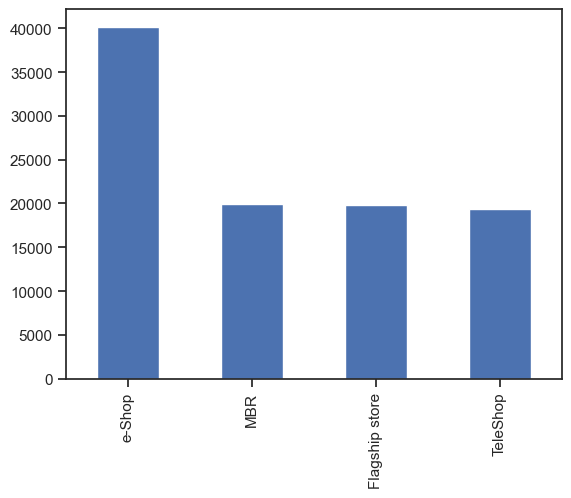

In [40]:
Customer_Final['Store_type'].value_counts().plot(kind='bar')

<Axes: >

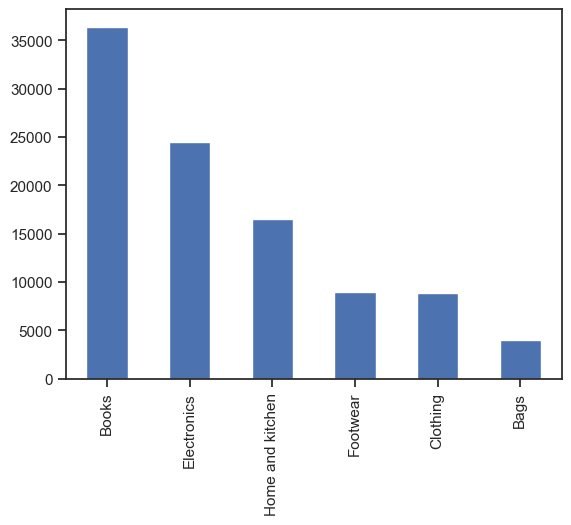

In [41]:
Customer_Final['prod_cat'].value_counts().plot(kind='bar')

<Axes: >

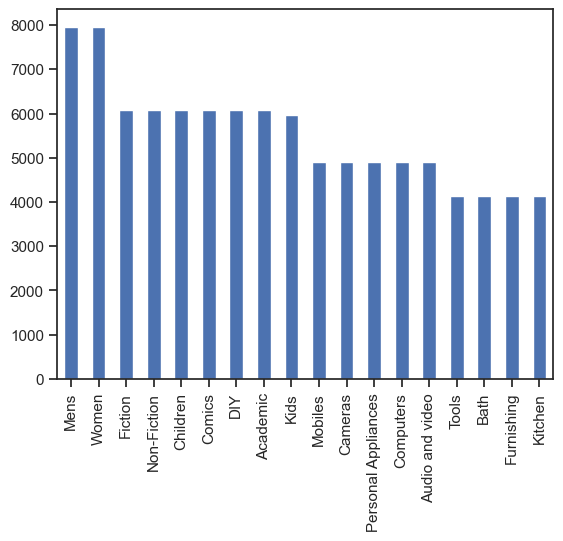

In [42]:
Customer_Final['prod_subcat'].value_counts().plot(kind='bar')

<Axes: >

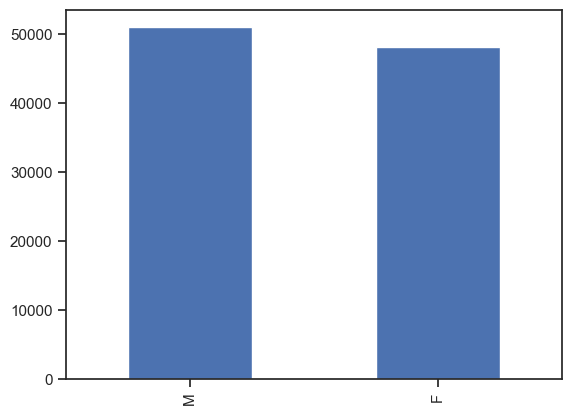

In [43]:
Customer_Final['Gender'].value_counts().plot(kind='bar')

## 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data


In [119]:
trans = pd.Series(Customer_Final.tran_date.apply(lambda x: x.replace("/", "-")))
trans = pd.to_datetime(trans, format="%d-%m-%Y")
trans.sort_values(inplace = True)
first = trans[trans.size-1]
last = trans[0]
last-first

Timedelta('921 days 00:00:00')

### b. Count of transactions where the total amount of transaction was negative

In [52]:
negative_trans = Customer_Final.loc[Customer_Final["total_amt"] < 0,"transaction_id"].count()
negative_trans

9294

## 5. Analyze which product categories are more popular among females vs male customers.

In [70]:
prod_gender = Customer_Final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
prod_gender

,Gender,prod_cat,Qty
0,F,Bags,4724
1,F,Books,42420
2,F,Clothing,10275
3,F,Electronics,29160
4,F,Footwear,11148
5,F,Home and kitchen,19580
6,M,Bags,4692
7,M,Books,45522
8,M,Clothing,11244
9,M,Electronics,32380


## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [83]:
max_cust = Customer_Final.groupby('city_code')['customer_Id'].count().sort_values(ascending=False)
max_cust.head()


city_code
4.0     10571
3.0     10467
7.0     10258
5.0     10116
10.0     9976
Name: customer_Id, dtype: int64

In [85]:
percent = round((max_cust[4.0] / max_cust.sum()) * 100,2)
percent

10.65

## 7. Which store type sells the maximum products by value and by quantity?

In [95]:
Customer_Final.groupby('Store_type')['Qty','total_amt'].sum().sort_values(by='Qty', ascending=False)


C:\Users\Yatharth Pandya\AppData\Local\Temp\ipykernel_19876\4241284273.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Customer_Final.groupby('Store_type')['Qty','total_amt'].sum().sort_values(by='Qty', ascending=False)


,Qty,total_amt
Store_type,,
e-Shop,98447,8.591575e+07
MBR,48285,4.170033e+07
Flagship store,48007,4.188397e+07
TeleShop,47339,4.046656e+07


## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [97]:
store_group = round(Customer_Final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,1741097.67,1697357.35,1578362.11,3232600.15
Books,14929235.10,14976235.17,15270030.36,31760663.61
Clothing,3583269.69,3863059.00,3725503.08,7581580.70
Electronics,11075680.20,10537572.82,9866694.18,22132370.98
Footwear,3704419.68,3336491.14,3707157.87,7911254.13
Home and kitchen,6850270.70,7289614.28,6318809.90,13297278.28


In [99]:
store_group.loc[["Clothing","Electronics"],"Flagship store"]

prod_cat
Clothing        3583269.69
Electronics    11075680.20
Name: Flagship store, dtype: float64

In [100]:
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

14658949.889999999

## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [102]:
gen_grp = round(Customer_Final.pivot_table(index = "prod_cat",columns = "Gender", values="total_amt", aggfunc='sum'),2)
gen_grp

Gender,F,M
prod_cat,,
Bags,4155971.30,4093445.98
Books,36988153.41,39875836.65
Clothing,9080252.41,9672238.48
Electronics,25096771.05,28515547.12
Footwear,9607658.97,9044016.15
Home and kitchen,16528709.34,17204301.92


In [104]:
gen_grp.loc[["Electronics"],"M"].sum()

28515547.12

In [105]:
gen_grp.loc[["Electronics"],"F"].sum()

25096771.05

## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [120]:
CF_X.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,both
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,both
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,both
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,both


In [158]:
new_df = CF_X[CF_X['total_amt']>0]
df1 =new_df.groupby('customer_Id')['transaction_id'].nunique()
df2 = df1[df1>=10].index.tolist()
print(len(df2))

27


## 11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?


In [112]:
# Converting DOB to datetime
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB, format = "%d-%m-%Y")
DOB = Customer_Final.DOB
# Finding age of each individual

Customer_Final['age'] = DOB.apply(lambda x: pd.to_datetime('today').year-x.year)
# Clipping age betwen 25-35

age_barred = Customer_Final[(Customer_Final.age>=25) & (Customer_Final.age<=35)].reset_index(drop=True)
age_barred.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat,age
0,272690,1988-01-02,F,2.0,98473978157,272690,6/10/2012,3,5,4,265,111.3,1171.3,Flagship store,both,Books,7,Fiction,35
1,272690,1988-01-02,F,2.0,98473978157,272690,6/10/2012,3,5,4,265,111.3,1171.3,Flagship store,both,Books,12,Academic,35
2,272690,1988-01-02,F,2.0,98473978157,272690,6/10/2012,3,5,4,265,111.3,1171.3,Flagship store,both,Books,10,Non-Fiction,35
3,272690,1988-01-02,F,2.0,98473978157,272690,6/10/2012,3,5,4,265,111.3,1171.3,Flagship store,both,Books,11,Children,35
4,272690,1988-01-02,F,2.0,98473978157,272690,6/10/2012,3,5,4,265,111.3,1171.3,Flagship store,both,Books,3,Comics,35


In [113]:
age_catg = age_barred.groupby('prod_cat')['total_amt'].sum().reset_index()
age_catg

,prod_cat,total_amt
0,Bags,1747358.60
1,Books,16006709.55
2,Clothing,4330039.74
3,Electronics,11360737.05
4,Footwear,4299442.29
5,Home and kitchen,7458197.50


In [114]:
age_catg[(age_catg.prod_cat=='Electronics') | (age_catg.prod_cat=='Books')]

,prod_cat,total_amt
1,Books,16006709.55
3,Electronics,11360737.05


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [115]:
# making all seperator as -
age_barred.tran_date = age_barred.tran_date.apply(lambda x: x.replace('/', '-'))

#converting the column to date time
age_barred.tran_date = pd.to_datetime(age_barred.tran_date, format='%d-%m-%Y')


In [116]:
date_barred = age_barred[(age_barred.tran_date > pd.to_datetime('01-01-2014', format='%d-%m-%Y')) & (age_barred.tran_date<pd.to_datetime('01-03-2014', format='%d-%m-%Y'))].reset_index(drop=True)
date_barred

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat,age
0,274296,1988-02-17,M,6.0,13335198152,274296,2014-01-14,6,5,4,667,280.14,2948.14,TeleShop,both,Books,7,Fiction,35
1,274296,1988-02-17,M,6.0,13335198152,274296,2014-01-14,6,5,4,667,280.14,2948.14,TeleShop,both,Books,12,Academic,35
2,274296,1988-02-17,M,6.0,13335198152,274296,2014-01-14,6,5,4,667,280.14,2948.14,TeleShop,both,Books,10,Non-Fiction,35
3,274296,1988-02-17,M,6.0,13335198152,274296,2014-01-14,6,5,4,667,280.14,2948.14,TeleShop,both,Books,11,Children,35
4,274296,1988-02-17,M,6.0,13335198152,274296,2014-01-14,6,5,4,667,280.14,2948.14,TeleShop,both,Books,3,Comics,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,271176,1992-12-05,F,6.0,2547329505,271176,2014-01-30,3,1,5,1428,749.70,7889.70,TeleShop,both,Clothing,1,Women,31
956,271176,1992-12-05,F,6.0,2547329505,271176,2014-01-30,3,1,5,1428,749.70,7889.70,TeleShop,both,Clothing,3,Kids,31
957,274618,1992-12-09,F,7.0,95974831788,274618,2014-01-13,1,1,4,561,235.62,2479.62,Flagship store,both,Clothing,4,Mens,31
958,274618,1992-12-09,F,7.0,95974831788,274618,2014-01-13,1,1,4,561,235.62,2479.62,Flagship store,both,Clothing,1,Women,31


In [117]:
date_barred.total_amt.sum()

2244367.71